In [2]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np


In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()


In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

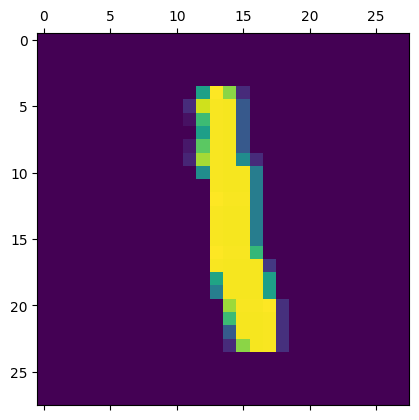

In [7]:
plt. matshow(x_train[6
                    ])

In [21]:
y_train[:3]
x_train=x_train/255
x_test=x_test/255

In [22]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [23]:
x_test_flattened.shape

(10000, 784)

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [25]:
model.fit(x_train_flattened,y_train,epochs=5,batch_size = 128)

Epoch 1/5
469/469 [==============================] - 5s 5ms/step - loss: 0.6791 - accuracy: 0.8332
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3635 - accuracy: 0.9015
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3202 - accuracy: 0.9120
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2998 - accuracy: 0.9171
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2880 - accuracy: 0.9197


In [26]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 2ms/step - loss: 0.2777 - accuracy: 0.9230


[0.27767685055732727, 0.9229999780654907]

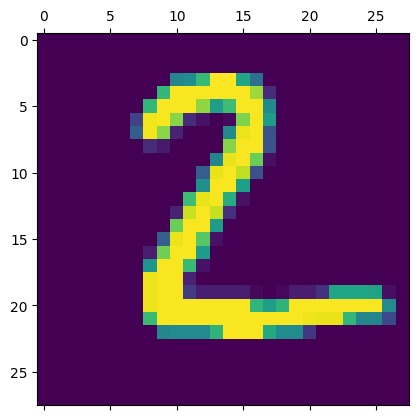

In [27]:
plt.matshow(x_test[1])

In [28]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]


313/313 [==============================] - 1s 2ms/step


array([1.3492116e-01, 2.7558417e-05, 2.7034426e-01, 9.3730950e-01,
       8.6519532e-03, 1.6905870e-01, 2.3886422e-04, 9.9976939e-01,
       2.0286767e-01, 7.9586089e-01], dtype=float32)

In [30]:
np.argmax(y_predicted[1])

2

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


Text(95.72222222222221, 0.5, 'Truth')

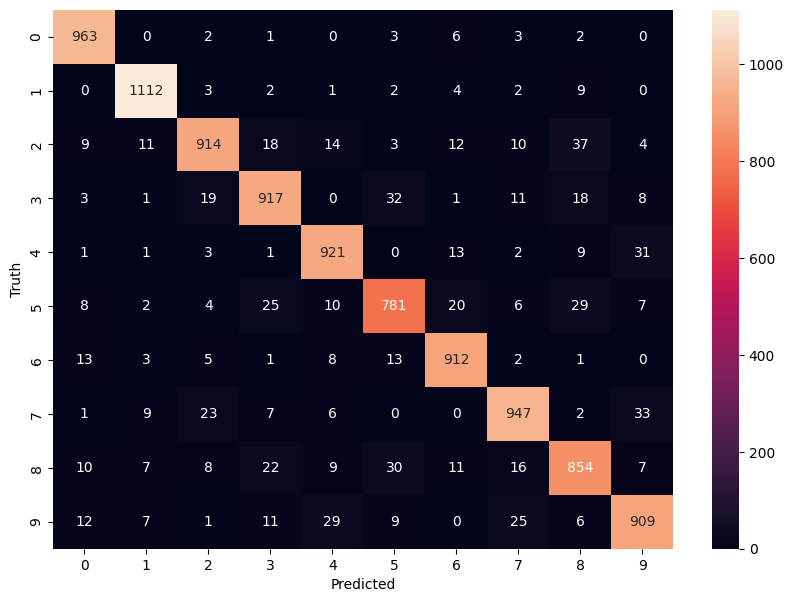

In [34]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Adding hidden layer


In [35]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.2777 - accuracy: 0.9200
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1240 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0867 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0639 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0507 - accuracy: 0.9843


In [36]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0723 - accuracy: 0.9781


[0.07232273370027542, 0.9781000018119812]

Text(95.72222222222221, 0.5, 'Truth')

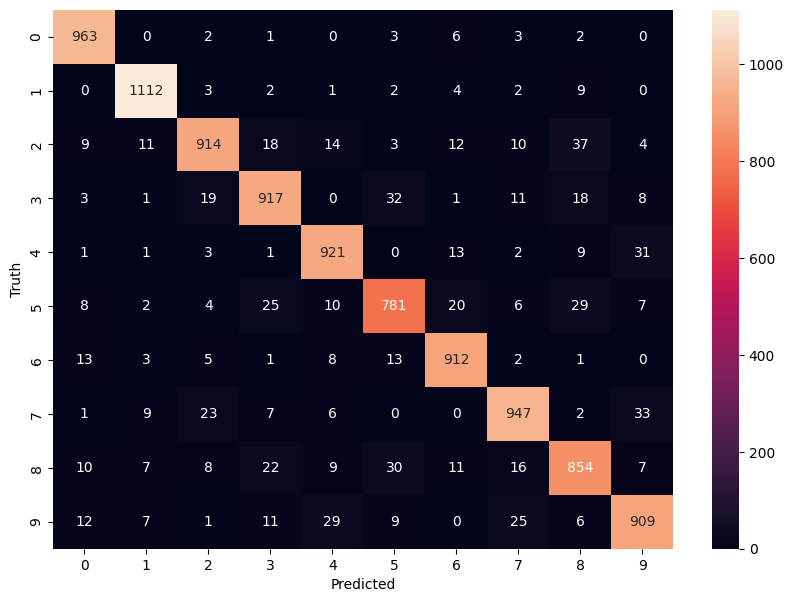

In [37]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2777 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1273 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0902 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0681 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0531 - accuracy: 0.9839
